# Tarea 08 - Distribuciones Discretas y Continuas
- **Nombre:** Sarmiento Basurto Douglas Bryan
- **Asignatura:** Simulación

## Librerías y Opciones Generales

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

In [ ]:
def graph_discrete(x, pf, title):
    plt.plot(x, pf, '--')
    plt.vlines(x, 0, pf, colors='b', lw=5, alpha=0.5)
    plt.title('Distribución: ' + title)
    plt.ylabel('Probabilidad')
    plt.xlabel('Valores')
    plt.show()

def graph_continuous(x, pf, title):
    plt.plot(x, pf)
    plt.title('Distribución: ' + title)
    plt.ylabel('Probabilidad')
    plt.xlabel('Valores')
    plt.show()

def histogram(x, title, bins = 10):
    plt.hist(x, bins)
    plt.title('Histograma de Distribución: ' + title)
    plt.ylabel('Frecuencia')
    plt.xlabel('Valores')
    plt.show()

## Distribuciones Discretas

### Distribución Hipergeométrica

La distribución hipergeométrica es la que describe experimentos en los cuales hay un muestreo aleatorio sin reemplazo, contrario a lo que ocurre con la distribución binomial.

En otras palabras, son de utilidad en las investigaciones en donde se trata de buscar el comportamiento de una muestra ante la presencia (o ausencia) de una propiedad en la muestra.

> **Por ejemplo:** <br> Un proceso de control de calidad, en donde se quiera comprobar la durabilidad y flexibilidad de reglas de plástico. Para ello, se seleccionará aleatoriamente un conjunto de reglas para someterse a diferentes pruebas de resistencia (búsqueda de una característica), pero una vez que lleguen al límite y se rompan, ya no podrán volver a la linea de producción (sin reemplazo).

Su función de masa de probabilidad es:

> $p(k,M,n,N)= \frac{\binom{n}{k} \binom{M-n}{N-k}}{\binom{M}{N}}$ <br><br>
en donde, <br>
$k \epsilon \left \[ max(0, N-M+n), min(n,N) \right \]$$

#### Gráfica de la distribución

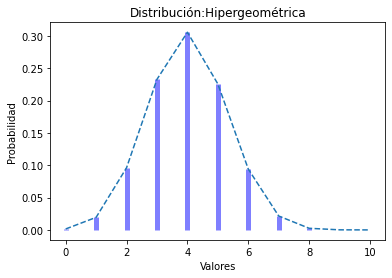

In [ ]:
M, n, N = 30, 10, 12
hypergeo = stats.hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf = hypergeo.pmf(x)

graph_discrete(x, pmf, title='Hipergeométrica')

#### Histograma de la distribución

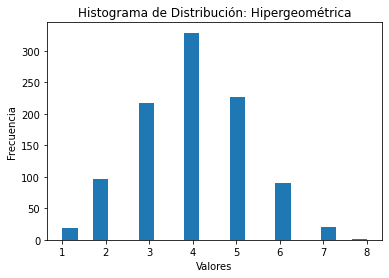

In [ ]:
random = hypergeo.rvs(1000)
histogram(random, title = 'Hipergeométrica', bins = 20)

### Distribución Uniforme

La distribución uniforme discreta es aquella que describe a los experimentos en donde hay n elementos, y cada uno de esos elementos tiene la misma probabilidad de ser generados/tomados/elegidos.

En otras palabras, en esta distribución todos los valores de la muestra elegida, tienen la misma probabilidad.

> **Por ejemplo:** <br>
El ejemplo más sencillo, sería el valor resultante al lanzar un dado de N lados. Después de un número determinado de lanzamientos, se dará que la probabilida de que salga un número es de 1/N.

Su función de masa de probabilidad es:

> $p(k)=\frac{1}{high - low}$ <br><br>
en donde,<br>
$k \epsilon \left \{ low, ..., high-1 \right \}$

#### Gráfica de la distribución

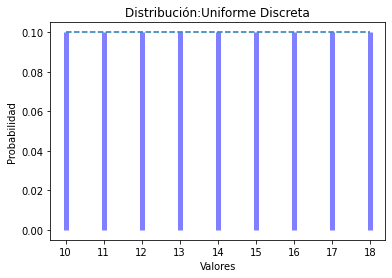

In [ ]:
low, high = 10, 20
discrete_uniform = stats.randint(low, high)
x = np.arange(
    stats.randint.ppf(0.01, low, high),
    stats.randint.ppf(0.99, low, high)
)
pmf = discrete_uniform.pmf(x)

graph_discrete(x, pmf, title='Uniforme Discreta')

#### Histograma de la distribución

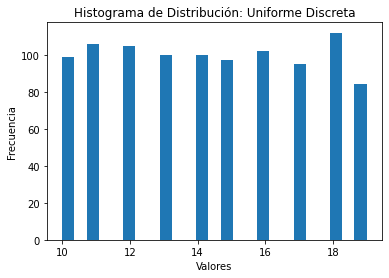

In [ ]:
random = discrete_uniform.rvs(1000)
histogram(random, title = 'Uniforme Discreta', bins = 25)

### Distribución Binomial Negativa

La distribución binomial negativa, es como una extensión de la distribución geométrica. Mientras que esta última trata de encontrar el primer éxito de exactamente n pruebas, la distribución binomial negativa trata aquellas investigaciones en donde se repiten los procesos o pruebas hasta encontrar exactamente n resultados favorables (éxitos).

En otras palabras, mientras que la distribución geométrica busca el primer éxito (r=1), la binomial negativa busca el r-ésimo éxito.

> **Por ejemplo:** <br>
Un ejemplo de este tipo de distribución se podría dar en una linea de producción en alguna fábrica, cuando se quiera encontrar los n productos defectuosos después de producir productos que pasen las pruebas de calidad. 

Su función de masa de probabilidad es:

> $f(k)=\binom{k+n-1}{n-1} p^{n}(1-p)^{k}$ <br><br>
en donde, <br>
 * $k \geq 0$, <br> 
 * $0 < p \leq 1$

#### Gráfica de la distribución

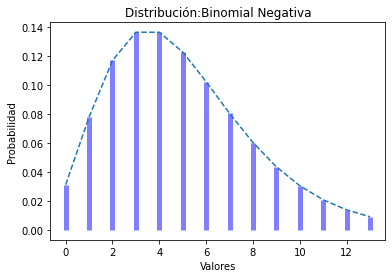

In [ ]:
n, p = 5, 0.5
negative_binomial = stats.nbinom(n, p)
x = np.arange(
    stats.nbinom.ppf(0.01, n, p),
    stats.nbinom.ppf(0.99, n, p)
)
pmf = negative_binomial.pmf(x)

graph_discrete(x, pmf, title='Binomial Negativa')

#### Histograma de la distribución

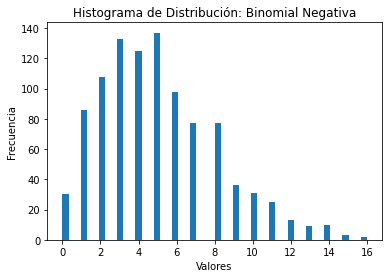

In [ ]:
random = negative_binomial.rvs(1000)
histogram(random, title = 'Binomial Negativa', bins = 50)

## Distribuciones Continuas

Realizar una investigación de las siguientes distribuciones, basandose en los ejemplos de clase:

- Pareto
- T de Student
- Chi Cuadrado
- Beta
- Gamma
- Log-Normal

### Distribución Pareto

La distribución de Pareto es biparamétrica. Un parámetro define la dispersión, y otro parámetro determina el valor mínimo que tendrá la población. Esta dispersión es útil para investigaciones en las cuales la mayor parte de la población tendrá valores más bajos, y los valores más altos se concentrarán en muestras más reducidas.

En otras palabras, se relaciona con la regla del 80/20. Esta regla determina que el 20% de una muestra, controla el 80% del total de una característica.

> **Por ejemplo:** <br>
Este tipo de distribución de probabilidad se puede encontrar en las plataformas digitales de videojuegos, como Steam, Epic Games, Origin, entre otros. Aquí, la biblioteca de videojuegos es extensa. Sin embargo, la mayoría de usuarios están jugando a videojuegos AAA, mientras que los juegos indies casi no son jugados. Por lo tanto, se podría aproximar a lo que dice la regla del 80/20.

Su función de densidad de probabilidad es:
> $f(x,b)=\frac{b}{x^{b+1}}$ <br><br>
donde,
* $x\geq 1$,
* $b > 0$

#### Gráfica de la distribución

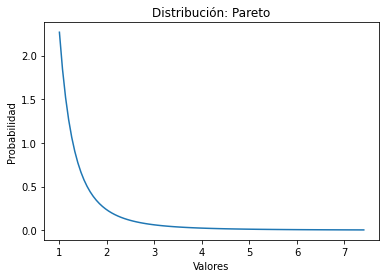

In [ ]:
k = 2.3
pareto = stats.pareto(k)

x = np.linspace(
    pareto.ppf(0.01),
    pareto.ppf(0.99), 
    100
)
pdf = pareto.pdf(x)

graph_continuous(x, pdf, title='Pareto')

#### Histograma de la distribución

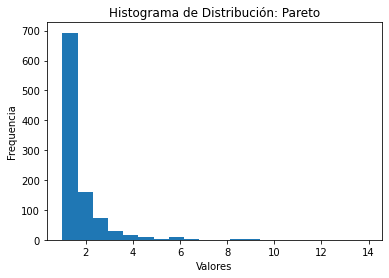

In [ ]:
random = pareto.rvs(1000)
histogram(random, title='Pareto', bins = 20)

### Distribución T de Student

La distribución t de Student se relaciona estrechamente con la distribución normal, y en su gráfica tiene una similitud notable, con la ligera diferencia de que la primera tiene una mayor dispersión que la distribución normal.

Esta distribución es la que se presenta en investigaciones en donde se quiere observar las diferencias que existen entre las medias de dos poblaciones distintas, o para contrastar la hipótesis de la media de una población.

> **Por ejemplo:** <br>
Se puede utilizar este tipo de distribución para observar las diferencias que existen en el comportamiento sobre las horas de juego entre jugadores de PC con jugadores de consola (PS, Xbox, Nintendo, entre otros).

Su función de densidad de probabilidad es:
> $f\left ( x, v  \right ) = \frac{\Gamma \left ( \left ( v+1 \right )/ 2 \right )}{\sqrt{\pi v}\Gamma \left ( v/2 \right )}\left ( 1+x^{2}/v \right )^{-\left ( v+1 \right )/2}$ <br><br>
donde,<br>
$v>0$

#### Gráfica de la distribución

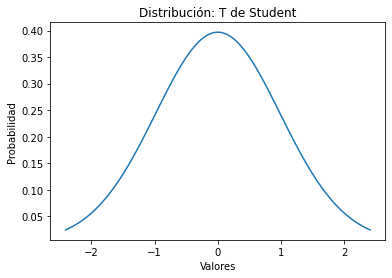

In [ ]:
df = 50
t = stats.t(df)

x = np.linspace(
    t.ppf(0.01),
    t.ppf(0.99),
    100
)
pdf = t.pdf(x)

graph_continuous(x, pdf, title='T de Student')

#### Histograma de la distribución

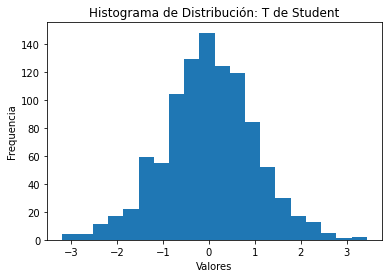

In [ ]:
random = t.rvs(1000)
histogram(random, title='T de Student', bins = 20)

### Distribución Chi-Cuadrado

La distribución Chi-Cuadrado, también conocida como distribución de Pearson, se obtiene mediante la suma de los cuadrados de n variables independientes, y que están distribuidas mediante una distribución normal.

Es realmente útil cuando se quiere determinar qué tanto se ajustan los valores de un modelo teórico con los que son observados realmente. En otras palabras, es útil para realizar pruebas de hipótesis y construir intervalos de confianza.

> **Por ejemplo:** <br>
Una de las aplicacions más conocidas de este tipo de distribución es para determinar si un conjunto de valores generados de manera pseudoaleatorios están uniformemente distruibuidos (Prueba de Uniformidad o Bondad de Ajuste).

Su función de densidad de probabilidad es:
> $f\left ( x, k  \right ) = \frac{1}{2^{k/2}\Gamma \left ( k/2 \right )}\left ( x^{k/2-1} \right ) exp\left ( -x/2 \right )$ <br><br>
donde,<br>
* $x>0$
* $k>0$

#### Gráfica de la distribución

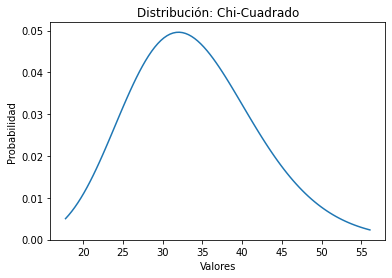

In [ ]:
df = 34
chi2 = stats.chi2(df)

x = np.linspace(
    chi2.ppf(0.01),
    chi2.ppf(0.99), 
    100
)
pdf = chi2.pdf(x)

graph_continuous(x, pdf, title='Chi-Cuadrado')

#### Histograma de la distribución

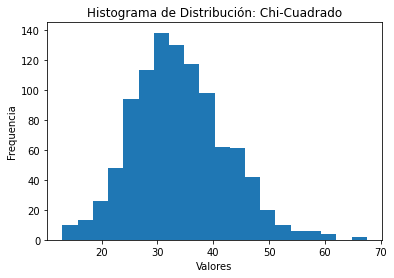

In [ ]:
random = chi2.rvs(1000)
histogram(random, title='Chi-Cuadrado', bins = 20)

### Distribución Beta

La distribución Beta toma valores en el intervalo (0, 1). Es por eso, que este tipo de distribución es la adecuada para poder modelar proporciones; pudiendo tomar diversas formas en la distribución según se definan los parámetros de entrada (a y b).


> **Por ejemplo:** <br>
*   En la inferencia bayesiana se suele usar cuando las observaciones obtenidas de un estudio tienen una distribución binomial.
*   Para determinar el tiempo requerido para completar una actividad determinada dentro de un proyecto, en función de un tiempo optimista y pesimista.

Su función de densidad de probabilidad es:
> $f\left ( x, a, b  \right ) = \frac{\Gamma \left ( a+b \right ) x^{a-1} \left ( 1-x \right )^{b-1}}{\Gamma \left ( a \right ) \Gamma \left ( b \right )}$ <br><br>
donde,<br>
* $0 \leq x \leq 1$
* $a>0$
* $b>0$

#### Gráfica de la distribución

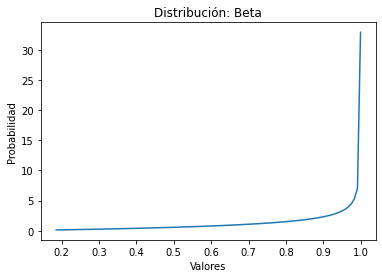

In [ ]:
a, b = 2.3, 0.6 
beta = stats.beta(a, b)

x = np.linspace(
    beta.ppf(0.01),
    beta.ppf(0.99), 
    100
)
pdf = beta.pdf(x)

graph_continuous(x, pdf, title='Beta')

#### Histograma de la distribución

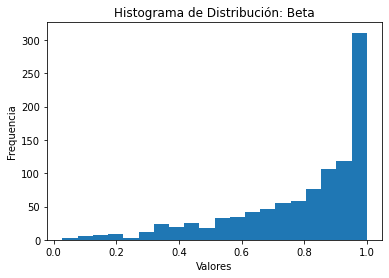

In [ ]:
random = beta.rvs(1000)
histogram(random, title='Beta', bins = 20)

### Distribución Gamma

La distribución Gamma, es un distribución biparamétrica de la cual se derivan otras como la distribución Chi-Cuadrado, por poner un ejemplo. Este tipo de distribución es útil cuando se quiere determinar el tiempo que transcurre desde que se obtiene la ocurrencia de un evento observado hasta que ocurre n veces más.

> **Por ejemplo:** <br>
* Debido a lo anterior expuesto, este tipo de distribución es adecuada para estudiar el tiempo de vida de componentes electrónicos.
* Otro ejemplo, sería en determinar el tiempo medio que hay entre la aparición de productos defectuosos dentro de una linea de producción en una fábrica. 

Su función de densidad de probabilidad es:
> $f\left ( x, a \right ) = \frac{x^{a-1}e^{-x}}{\Gamma \left ( a \right )}$ <br><br>
donde,<br>
* $x \geq 0$
* $a>0$

#### Gráfica de la distribución

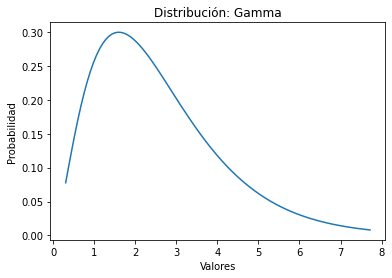

In [ ]:
a = 2.6
gamma = stats.gamma(a)

x = np.linspace(
    gamma.ppf(0.01),
    gamma.ppf(0.99), 
    100
)
pdf = gamma.pdf(x)

graph_continuous(x, pdf, title='Gamma')

#### Histograma de la distribución

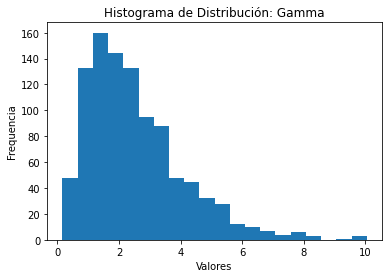

In [ ]:
random = gamma.rvs(1000)
histogram(random, title='Gamma', bins = 20)

### Distribución Log-Normal

La distribución Log-Normal resulta de aplicar una función exponencial a una variable que se distribuye de manera normal. Se puede decir también, que este tipo de distribución se puede aplicar a variables aleatorias limitadas por cero, pero que no tienen muchos valores grandes.


> **Por ejemplo:** <br>
Este tipo de distribución es realmente útil en el campo de la Medicina. Aquí, se puede encontrar en estudios como el periodo de incubación de determinada enfermedad, el tiempo de supervivencia de pacientes con enfermedades graves, entre otras.

Su función de densidad de probabilidad es:
> $f\left ( x, s \right ) = \frac{1}{sx\sqrt{2\pi }} exp\left ( -\frac{log^{2}\left ( x \right )}{2s^{2}} \right )$ <br><br>
donde,<br>
* $x>0$
* $s>0$

#### Gráfica de la distribución

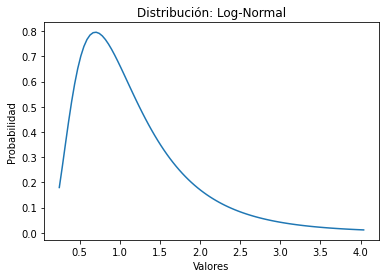

In [ ]:
sigma = 0.6
lognormal = stats.lognorm(sigma)

x = np.linspace(
    lognormal.ppf(0.01),
    lognormal.ppf(0.99), 
    100
)
pdf = lognormal.pdf(x)

graph_continuous(x, pdf, title='Log-Normal')

#### Histograma de la distribución

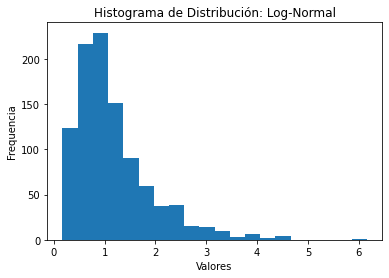

In [ ]:
random = lognormal.rvs(1000)
histogram(random, title='Log-Normal', bins = 20)

## Referencias


* Epidat 4: Ayuda de Distribuciones de probabilidad. (2014). Sergas.es. https://www.sergas.es/Saude-publica/Documents/1899/Ayuda_Epidat_4_Distribuciones_de_probabilidad_Octubre2014.pdf

* Lopez Briega, R. E. (2016). Distribuciones de probabilidad con Python. Github.Io. https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

* The SciPy community. (2022). Statistical functions (scipy.stats) — SciPy v1.8.1 Manual. Scipy.org. https://docs.scipy.org/doc/scipy/reference/stats.html

* Suárez, L. A. C., & García, I. B. (2022). DISTRIBUCIÓN BETA. Amazonaws.com. https://rstudio-pubs-static.s3.amazonaws.com/166233_44a100ae858948c89b6e20ae657088e9.html

